**Import the libraries**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [5]:
df = pd.read_csv("teleCust.csv")

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Familiarizing with the dataset**

In [ ]:
for i in df.columns:
    print(df[i].value_counts())
    print("-----------------------------------")

In [9]:
columns_to_drop = ["ed", "employ"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [10]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


In [27]:
df.isnull().value_counts()

region  tenure  age    marital  address  income  retire  gender  reside  custcat
False   False   False  False    False    False   False   False   False   False      1000
Name: count, dtype: int64

**EDA**

*Determine the correlation between the heatmap and the variables*

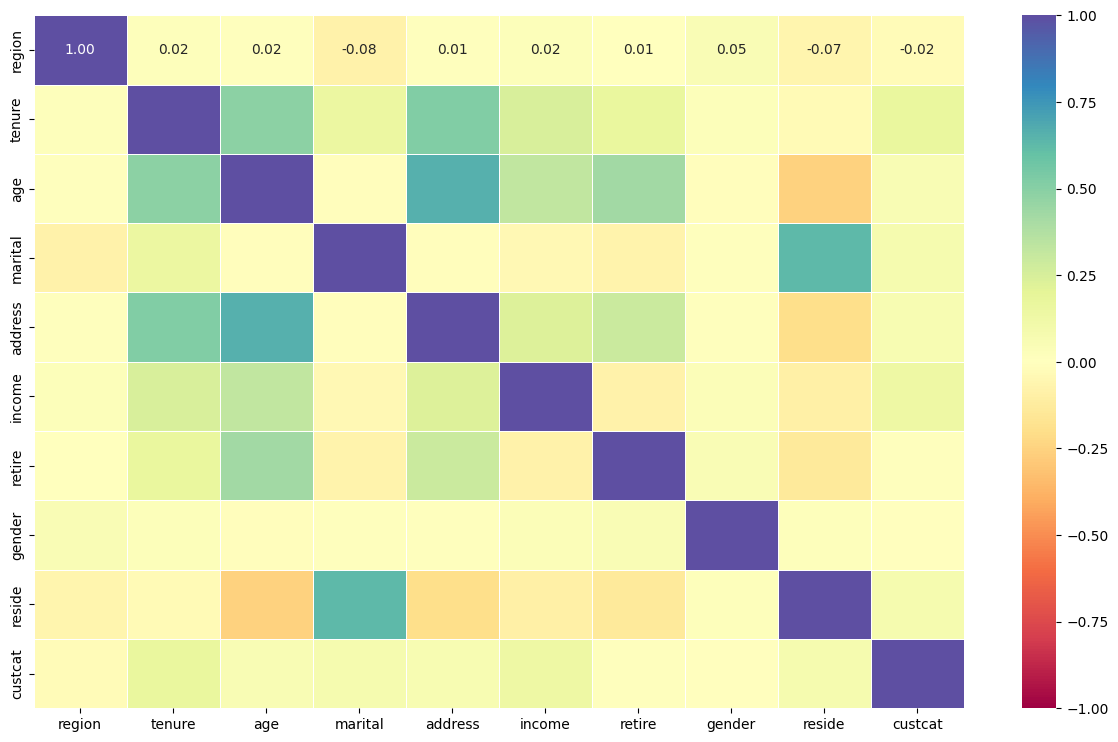

In [35]:
plt.figure(figsize = (15,9))
correlation = df.corr()
sns.heatmap(correlation, annot = True, fmt=".2f", linewidth=0.5, cmap="Spectral", vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()


In [37]:
correlation

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,-0.083651,0.038706,-0.097591,0.134525
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.053906,1.000000,0.016556,-0.004966
reside,-0.065158,-0.036592,-0.254993,0.625999,-0.201645,-0.097591,-0.140120,0.016556,1.000000,0.082022
custcat,-0.023771,0.166691,0.056909,0.083836,0.067913,0.134525,0.008908,-0.004966,0.082022,1.000000


In [55]:
columns_to_drop = ["retire", "gender"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [59]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3
